# Visualize samples for NGC 4047 in galactocentric radius and angle.

In [1]:
import os
import numpy as np
from astropy.table import Table, join, Column
import matplotlib.pyplot as plt
import sys
sys.path.append('../edge_pydb')
from edge_conv import gc_polr
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Read the observational values

In [2]:
# if os.path.exists('../img_califa/edge.pipe3d.hdf5'):
#     print('Working on full EDGE database')
#     hafile = '../img_califa/edge.pipe3d.hdf5'
#     cofile = '../img_comom/edge.comom_smo7.hdf5'
# else:
    print('Working on NGC 4047 data')
    hafile = '../img_califa/NGC4047.pipe3d.hdf5'
    cofile = '../img_comom/NGC4047.comom_smo7.hdf5'

Working on NGC 4047 data


In [3]:
cotab  = Table.read(cofile, path='smo')
# For normalized radius we need R25 and center position
globaldir = '../dat_glob/'
coflux  = Table.read(globaldir+'obs/edge_coflux_smo7.csv', format='ascii.ecsv')
radec   = Table([coflux['Name'], coflux['coRactr_smo7'], coflux['coDectr_smo7']])
join1   = join(cotab, radec, keys='Name')
leda    = Table.read(globaldir+'external/edge_leda.csv', format='ascii.ecsv')
r25tab  = Table([leda['Name'], leda['ledaD25'], leda['ledaPA'], leda['ledaIncl']])
alltab  = join(join1, r25tab, keys='Name')
print(alltab.colnames)

['Name', 'ix', 'iy', 'ra_off', 'dec_off', 'emom0max', 'mom0', 'emom0', 'coRactr_smo7', 'coDectr_smo7', 'ledaD25', 'ledaPA', 'ledaIncl']


## Calculate polar coordinates in galaxy plane

In [4]:
rarc, azdeg = gc_polr(alltab['coRactr_smo7']+alltab['ra_off'], 
                  alltab['coDectr_smo7']+alltab['dec_off'], 
                  alltab['coRactr_smo7'], alltab['coDectr_smo7'],
                  np.array(alltab['ledaPA']), 
                  np.array(alltab['ledaIncl']))

## Produce the dot plots

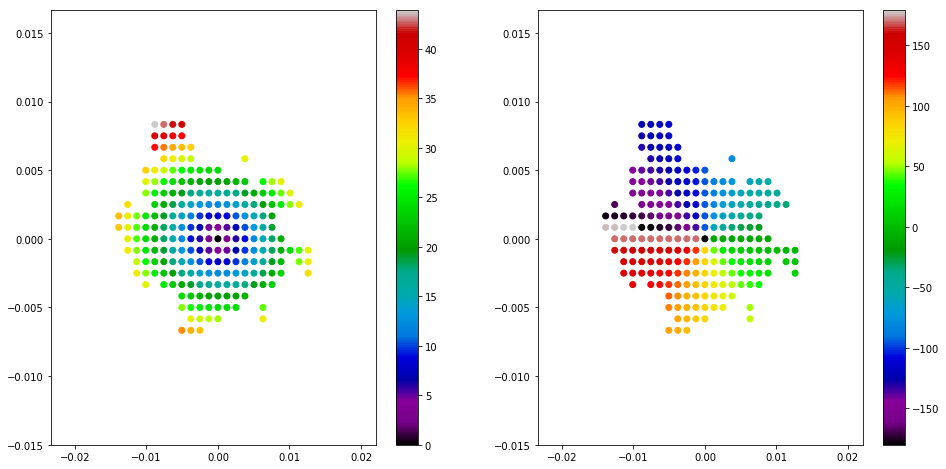

In [5]:
cmap = plt.cm.get_cmap('nipy_spectral')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
sel = (alltab['mom0']>0)
rplt = ax1.scatter(alltab['ra_off'][sel],alltab['dec_off'][sel],c=rarc[sel],cmap=cmap)
plt.colorbar(rplt,ax=ax1)
tplt = ax2.scatter(alltab['ra_off'][sel],alltab['dec_off'][sel],c=azdeg[sel],cmap=cmap)
plt.colorbar(tplt,ax=ax2)